## Questionário 44 (Q44)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-a à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

**Questão 1.** O _dataset_ [covid19-weekly-trends-in-europe](https://github.com/gcpeixoto/ICD/blob/main/database/covid19-weekly-trends-in-europe.csv) contém tendências semanais de casos de Covid-19 em diferentes países da Europa com referência ao dia 8 de novembro de 2021. Separe a série correspondente ao número de casos nos últimos 7 dias (_Cases in the last 7 days_) entre países pertencentes à União Europeia (_UE_) e não pertencentes à UE (_non-UE_). Assinale a alternativa que associa corretamente o grupo de países ao valor do coeficiente de Pearson.

A. _non-UE_: 620983827.08

B. _UE_: 620983827.08

C. _UE_: 750983827.02

D. _non-UE_: 8290903184.71

In [1]:
import pandas as pd

def p(x):
    pearson = 3*(x.mean() - x.median()) * x.std()
    return pearson[0]

UE = [
    'Austria',
    'Belgium',
    'Bulgaria',
    'Croatia',
    'Republic of Cyprus',
    'Czechia',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Ireland',
    'Italy',
    'Latvia',
    'Lithuania',
    'Luxembourg',
    'Malta',
    'Netherlands',
    'Poland',
    'Portugal',
    'Romania',
    'Slovakia',
    'Slovenia',
    'Spain',
    'Sweden'
]

df = pd.read_csv("https://github.com/gcpeixoto/ICD/raw/main/database/covid19-weekly-trends-in-europe.csv")


In [2]:
df.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceeding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Russia,281305,272147,3.0,1926,8276,7938,4.0,57,146018963
1,UK,245052,281168,-13.0,3584,1173,1099,7.0,17,68367364
2,Germany,172611,131880,31.0,2051,800,465,72.0,10,84145628
3,Ukraine,153131,152897,0.2,3530,4355,3857,13.0,100,43378803
4,Poland,78963,52327,51.0,2089,758,552,37.0,20,37790630


In [3]:
nome = list(df['Country, Other'])
nome.sort()
i = 0
for pais in nome:
    if pais in UE:
        i += 1
nome

['Albania',
 'Andorra',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Channel Islands',
 'Croatia',
 'Czechia',
 'Denmark',
 'Estonia',
 'Faeroe Islands',
 'Finland',
 'France',
 'Germany',
 'Gibraltar',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Isle of Man',
 'Italy',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Monaco',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'UK',
 'Ukraine']

In [248]:
isUE = []
for country in df["Country, Other"]:
    if country in UE:
        isUE.append('UE')
    else:
        isUE.append('non-UE')
df['isEU'] = isUE
df.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceeding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population,isEU
0,Russia,281305,272147,3.0,1926,8276,7938,4.0,57,146018963,non-UE
1,UK,245052,281168,-13.0,3584,1173,1099,7.0,17,68367364,non-UE
2,Germany,172611,131880,31.0,2051,800,465,72.0,10,84145628,UE
3,Ukraine,153131,152897,0.2,3530,4355,3857,13.0,100,43378803,non-UE
4,Poland,78963,52327,51.0,2089,758,552,37.0,20,37790630,UE


In [249]:
df_non_eu = df.groupby(["isEU"]).get_group('non-UE')
df_eu = df.groupby(["isEU"]).get_group('UE')

In [244]:
print("UE: "+ str(p(df_eu[['Cases in the last 7 days']])))
print("Non-UE: "+ str(p(df_non_eu[['Cases in the last 7 days']])))

UE: 620983827.088694
Non-UE: 8290903184.710569


In [250]:
print("UE: "+ str(p(df_eu[['Cases in the last 7 days']])))
print("Non-UE: "+ str(p(df_non_eu[['Cases in the last 7 days']])))

UE: 606925009.7401268
Non-UE: 8347315637.069853


<hr>

**Questão 2.** Analise as seguintes distribuições normais aleatórias:


<center><img src='https://i.imgur.com/Aa8FZQt.png' width=500 heigth=500></center>


Assinale a alternativa em que as curvas aparecem em ordem crescente de desvio padrão.

A. (A, B, C, D)

***B. (B, A, D, C)***

C. (B, A, C, D)

D. (A, B, D, C)

<div class="alert alert-block alert-success">
<b>Resposta:</b> B. (B, A, D, C)
</div>

<hr>

**Questão 3.** O código

```python
import numpy as np, from scipy.stats import norm
N, band = 100, 0.5

np.random.seed(2)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)),
     np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
Xp = np.linspace(-5, 10, 1000)[:, np.newaxis]

dens = 0.3*norm(0,1).pdf(Xp[:, 0]) + 0.7*norm(5,1).pdf(Xp[:, 0])
```
gera a distribuição sombreada `dens` apresentada nas figuras de (a) a (d) abaixo. 

<center><img src='https://i.imgur.com/IAO3Gd3.png' width=500 heigth=500></center>

Com base nos _kernels_ disponíveis na classe `KernelDensity`
do módulo _scikit-learn_, assinale a alternativa que melhor preeche as lacunas na sentença:

*"O kernel ______ aproxima a distribuição em ______, ao passo que o kernel ______ aproxima a distribuição mostrada em ______."*


A. _'linear'_ / (a) / _'gaussian'_ / (d)

B. _'linear'_ / (b) / _'tophat'_ / (a)

***C. _'epanechnikov'_ / \(c\) / _'linear'_ / (d)***

D. _'gaussian'_ / (b) / _'epanechnikov'_ / \(c\)

<div class="alert alert-block alert-success">
<b>Resposta:</b> C.  ‘<i>epanechnikov</i>’ / (c) / ‘<i>linear</i>’ / (d)
</div>

Text(-3.5, 0.31, 'Linear')

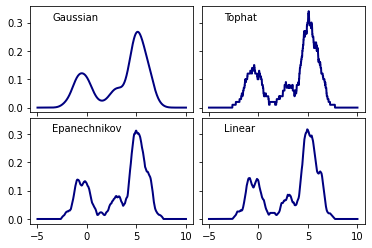

In [77]:

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(2)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3*norm(0,1).pdf(Xp[:, 0]) + 0.7*norm(5,1).pdf(Xp[:, 0])

kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax[0, 0].plot(X_plot[:, 0], np.exp(log_dens), color='navy', lw=lw, linestyle="-",
                 )
ax[0, 0].text(-3.5, 0.31, "Gaussian")

kde = KernelDensity(kernel='tophat', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
ax[0, 1].plot(X_plot[:, 0], np.exp(log_dens), color='navy', lw=lw, linestyle="-",
                 )
ax[0, 1].text(-3.5, 0.31, "Tophat")

kde = KernelDensity(kernel='epanechnikov', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].plot(X_plot[:, 0], np.exp(log_dens), color='navy', lw=lw, linestyle="-",
                 )
ax[1, 0].text(-3.5, 0.31, "Epanechnikov")

kde = KernelDensity(kernel='linear', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].plot(X_plot[:, 0], np.exp(log_dens), color='navy', lw=lw, linestyle="-",
                 )
ax[1, 1].text(-3.5, 0.31, "Linear")

In [202]:
data = pd.read_csv("C:\\Users\\Administrator\\Downloads\\data.csv")

In [225]:
data.groupby("dateRep").get_group("08/11/2021").iloc[10]

dateRep                    08/11/2021
day                                 8
month                              11
year                             2021
cases                           15513
deaths                             33
countriesAndTerritories       Germany
geoId                              DE
countryterritoryCode              DEU
popData2020                  83166711
continentExp                   Europe
Name: 2629, dtype: object

In [227]:
data.groupby("dateRep").get_group("07/11/2021").iloc[10]['cases']

23543

In [231]:
total = 0
for i in range(1,8):
    total += data.groupby("dateRep").get_group(f"0{i}/11/2021").iloc[10]['cases']
    print(i)

1
2
3
4
5
6
7


In [232]:
total

169483